image.shape=(720, 1280, 3)
image[0][0:10]=[[65 61 49]
 [48 44 32]
 [28 24 12]
 [23 19  8]
 [37 33 22]
 [49 45 34]
 [45 41 29]
 [35 31 19]
 [34 30 18]
 [39 36 21]]
gray.shape=(720, 1280)
gray[0][0:10]=[61 44 24 19 33 45 41 31 30 35]


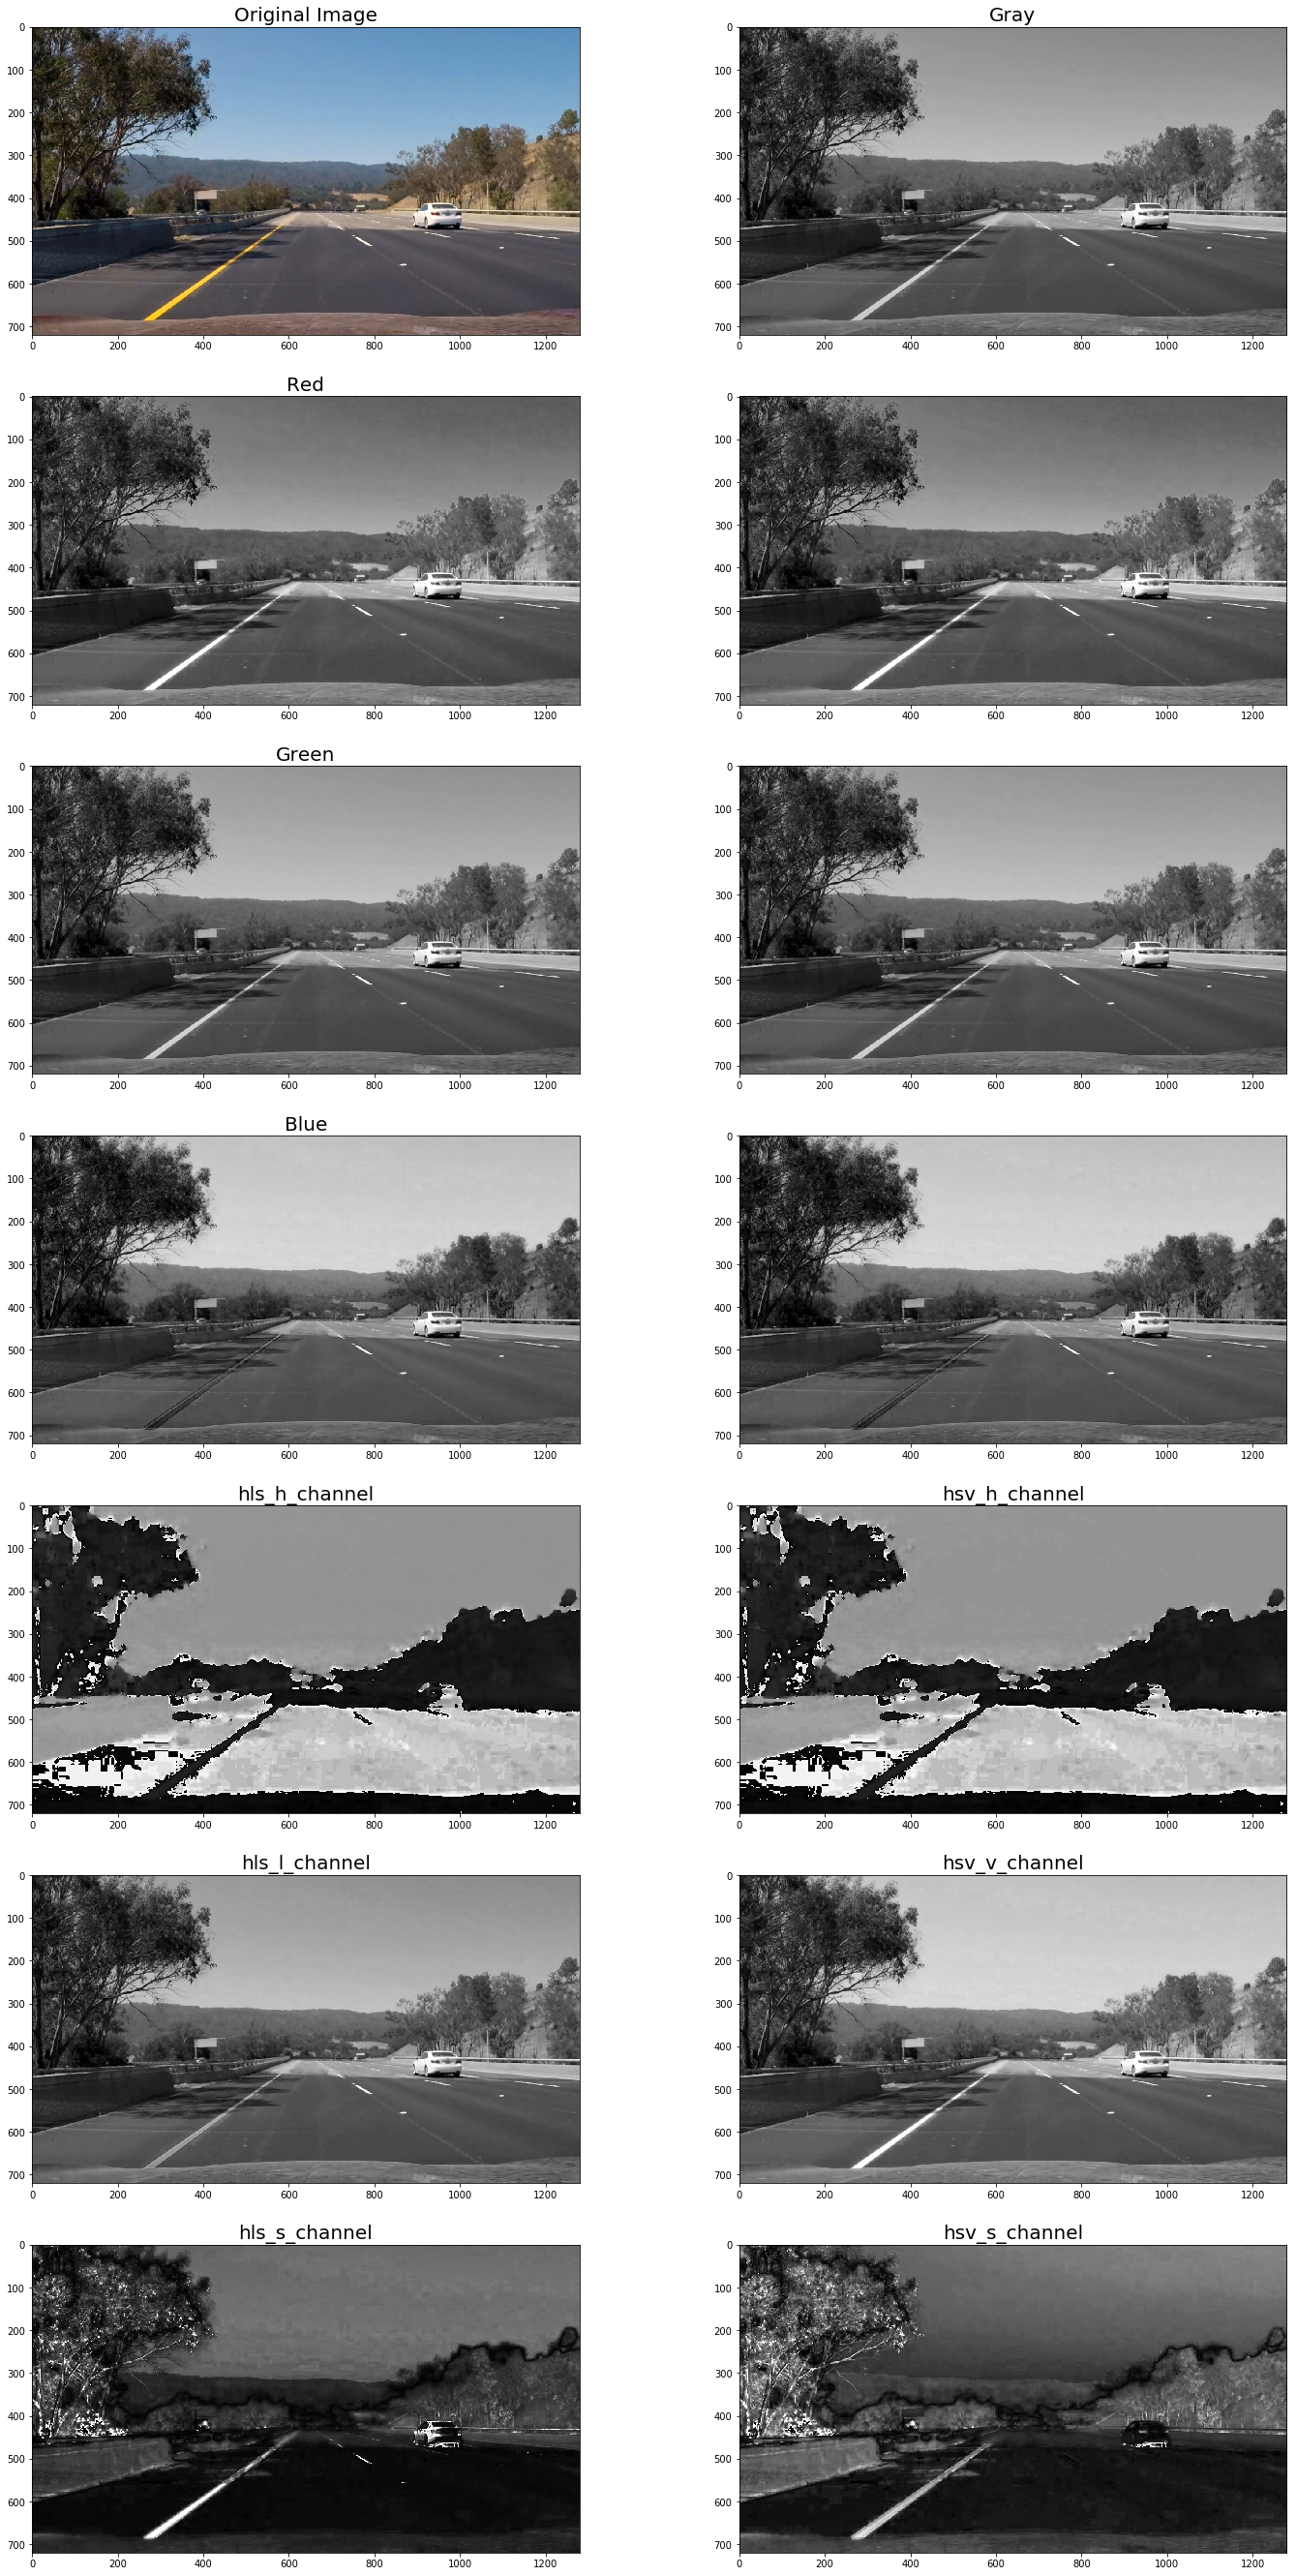

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

# NOTE jpg and png format pixel values are different ranges? jpg = 8bit?
#image = mpimg.imread('./test_images/straight_lines1.jpg')
image = mpimg.imread('./debug_images/orig/frame532.jpg')
#image = mpimg.imread('./debug_images/orig/frame563.jpg')
#plt.imshow(image)

print("image.shape={}".format(image.shape))
print("image[0][0:10]={}".format( image[0][0:10] ))

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("gray.shape={}".format(gray.shape))
print("gray[0][0:10]={}".format( gray[0][0:10] ))

red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

zeros = np.zeros_like(red)
red_image = np.dstack(( red, red, red))
green_image = np.dstack(( green, green, green ))
blue_image = np.dstack(( blue, blue, blue ))

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS).astype(np.float)
hls_h_channel = hls[:,:,0]
hls_l_channel = hls[:,:,1]
hls_s_channel = hls[:,:,2]

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float)
hsv_h_channel = hsv[:,:,0]
hsv_s_channel = hsv[:,:,1]
hsv_v_channel = hsv[:,:,2]



f, axes = plt.subplots(7, 2, squeeze=False, figsize=(24, 48))
# f.tight_layout()

axes[0][0].imshow(image)
axes[0][0].set_title('Original Image', fontsize=20)

axes[0][1].imshow(gray, cmap='gray')
axes[0][1].set_title('Gray', fontsize=20)

axes[1][0].imshow(red_image)
axes[1][0].set_title('Red', fontsize=20)

axes[2][0].imshow(green_image)
axes[2][0].set_title('Green', fontsize=20)

axes[3][0].imshow(blue_image)
axes[3][0].set_title('Blue', fontsize=20)

axes[1][1].imshow(red, cmap='gray')
axes[2][1].imshow(green, cmap='gray')
axes[3][1].imshow(blue, cmap='gray')

axes[4][0].imshow(hls_h_channel, cmap='gray')
axes[4][0].set_title('hls_h_channel', fontsize=20)

axes[5][0].imshow(hls_l_channel, cmap='gray')
axes[5][0].set_title('hls_l_channel', fontsize=20)

axes[6][0].imshow(hls_s_channel, cmap='gray')
axes[6][0].set_title('hls_s_channel', fontsize=20)

axes[4][1].imshow(hsv_h_channel, cmap='gray')
axes[4][1].set_title('hsv_h_channel', fontsize=20)

axes[5][1].imshow(hsv_v_channel, cmap='gray')
axes[5][1].set_title('hsv_v_channel', fontsize=20)

axes[6][1].imshow(hsv_s_channel, cmap='gray')
axes[6][1].set_title('hsv_s_channel', fontsize=20)


In [45]:
import numpy as np
import cv2

def abs_sobel_thresh(img, orient='x', ksize=3, thresh_min=0, thresh_max=255):
    """Absolute Sobel Gradient Thresholded
    
    Args:
        #img (numpy.ndarray): Source image. Color channels in RGB order.
        img (numpy.ndarray): Source image. Single channel (e.g. gray or red)
        thresh_min (int)
        thresh_max (int)
    """
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize)
        
    # 3) Take the absolute value of the gradient
    abs_sobel = np.absolute(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    
    # 6) Return this mask as your binary_output image
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    """Magnitude of Sobel in x and y directions and thresholded
    
    Args:
        #img (numpy.ndarray): Source image. Color channels in RGB order.
        img (numpy.ndarray): Source image. Single channel (e.g. gray or red)
        sobel_kernel (int)
        mag_thresh (tuple) : (min, max) 2 element tuple 
    """
    ## 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 1) Use red channel
    #aspect = image[:,:,0]
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    sobel_mag = np.sqrt( sobel_x**2 + sobel_y**2 )
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*sobel_mag/np.max(sobel_mag))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    # 6) Return this mask as your binary_output image
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    """Direction of Sobel gradient in x and y combined then thresholded
    
    Args:
        img (numpy.ndarray): Source image. Color channels in RGB order.
        sobel_kernel (int)
        thresh (tuple) : (min, max) 2 element tuple, default 0 to 90 degrees
    """
    # Apply the following steps to img
    ## 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 1) Use red channel
    aspect = image[:,:,0]
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(aspect, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(aspect, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    gradient = np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like( gradient )
    
    # 6) Return this mask as your binary_output image
    binary_output[(gradient >= thresh[0]) & (gradient <= thresh[1])] = 1

    return binary_output


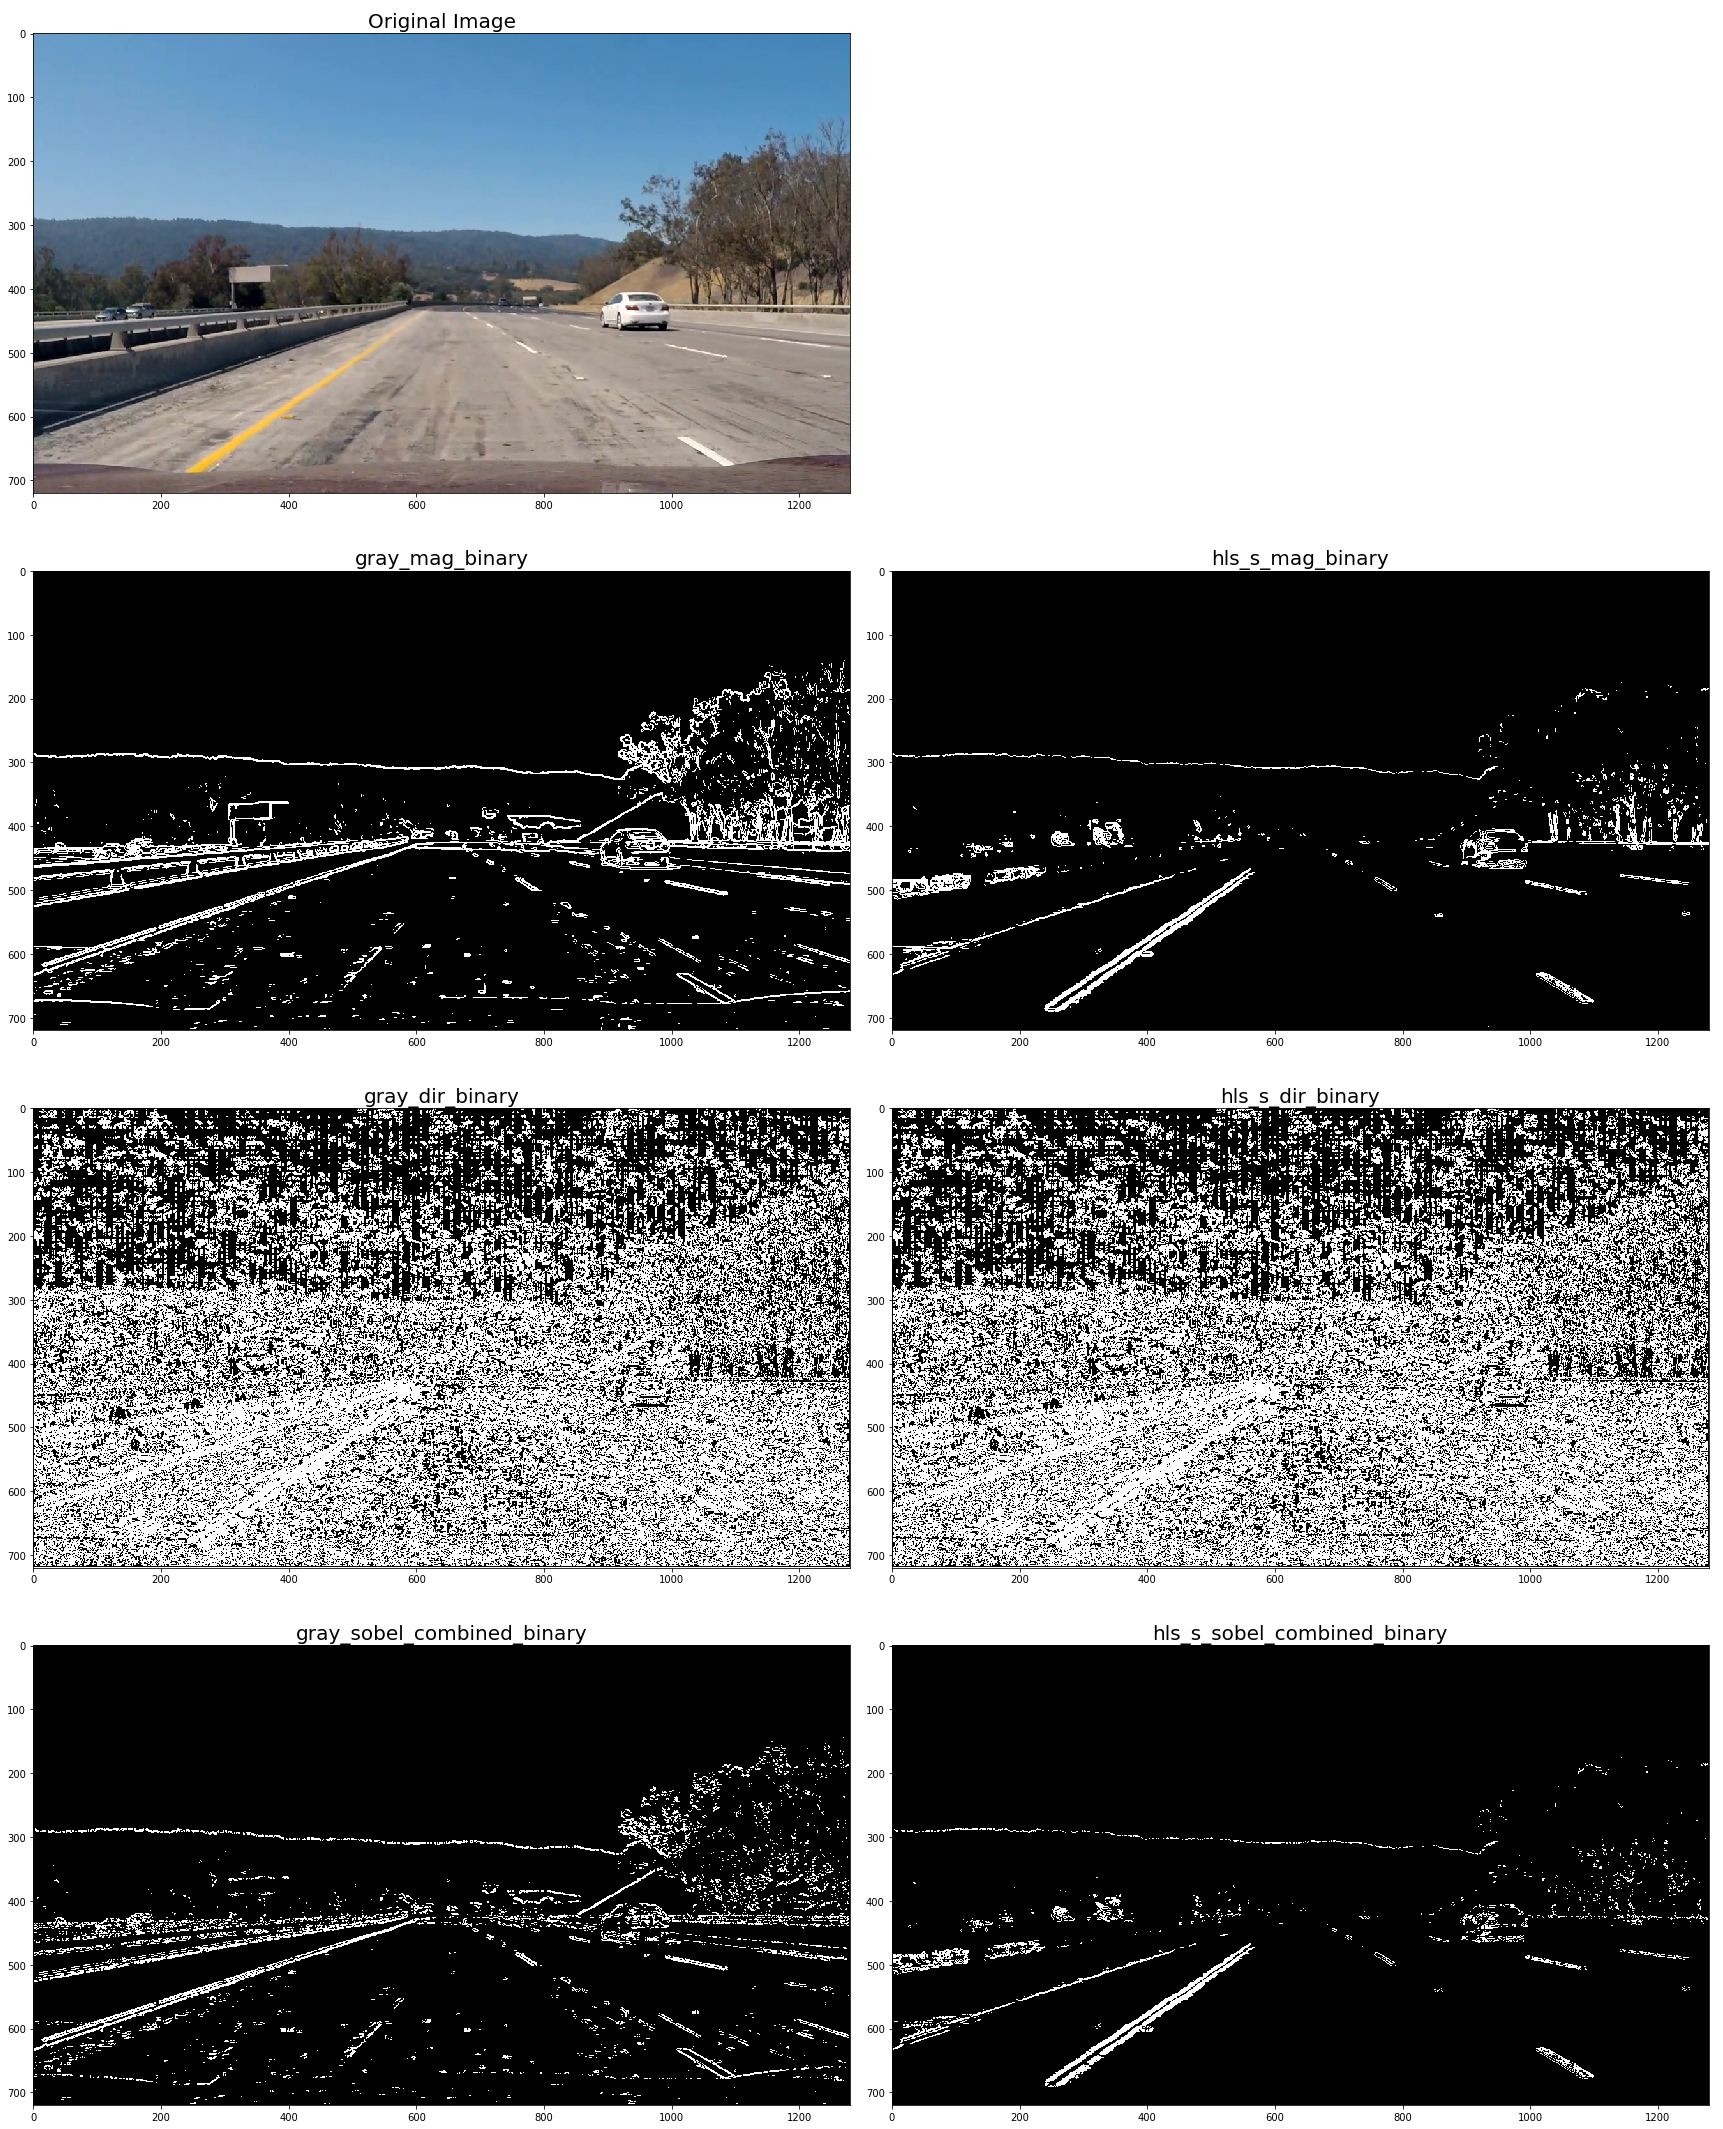

In [80]:
#image = mpimg.imread('./test_images/straight_lines1.jpg')
#image = mpimg.imread('./debug_images/orig/frame532.jpg')
image = mpimg.imread('./debug_images/orig/frame563.jpg')

# 1) Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 1) Use red channel
red = image[:,:,0]

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS).astype(np.float)
hls_s = hls[:,:,2]
    
sobel_thresh=(30, 135) # (30,100) seems to work well
sobel_kernel_mag = 5
sobel_kernel_dir = 5

### Gray
### Sobel magnitude
gray_mag_binary = mag_thresh(gray, sobel_kernel=sobel_kernel_mag, mag_thresh=sobel_thresh) 

### Sobel direction (0.5 to 1.4) is about (30 to 80 degrees)
gray_dir_binary = dir_threshold(gray, sobel_kernel=sobel_kernel_dir, thresh=(0.5, 1.5))

### Combine magnitude and direction where both thresholds are satisfied
gray_sobel_combined_binary = np.zeros_like( gray_mag_binary )
gray_sobel_combined_binary[((gray_mag_binary == 1) & (gray_dir_binary == 1))] = 1

### Red
red_mag_binary = mag_thresh(red, sobel_kernel=sobel_kernel_mag, mag_thresh=sobel_thresh) # (30,100) seems to work well
red_dir_binary = dir_threshold(red, sobel_kernel=sobel_kernel_dir, thresh=(0.5, 1.5))

red_sobel_combined_binary = np.zeros_like( red_mag_binary )
red_sobel_combined_binary[((red_mag_binary == 1) & (red_dir_binary == 1))] = 1

### HLS_S
hls_s_mag_binary = mag_thresh(hls_s, sobel_kernel=sobel_kernel_mag, mag_thresh=sobel_thresh) # (30,100) seems to work well
hls_s_dir_binary = dir_threshold(hls_s, sobel_kernel=sobel_kernel_dir, thresh=(0.5, 1.5))

hls_s_sobel_combined_binary = np.zeros_like( hls_s_mag_binary )
hls_s_sobel_combined_binary[((hls_s_mag_binary == 1) & (hls_s_dir_binary == 1))] = 1

######## plot ########
f, axes = plt.subplots(4, 2, squeeze=False, figsize=(24, 30))
f.tight_layout()

axes[0][0].imshow(image)
axes[0][0].set_title('Original Image', fontsize=20)

axes[0][1].axis('off')

# gray
axes[1][0].imshow(gray_mag_binary, cmap='gray')
axes[1][0].set_title('gray_mag_binary', fontsize=20)
axes[2][0].imshow(gray_dir_binary, cmap='gray')
axes[2][0].set_title('gray_dir_binary', fontsize=20)
axes[3][0].imshow(gray_sobel_combined_binary, cmap='gray')
axes[3][0].set_title('gray_sobel_combined_binary', fontsize=20)

# red
# axes[1][1].imshow(red_mag_binary, cmap='gray')
# axes[1][1].set_title('red_mag_binary', fontsize=20)
# axes[2][1].imshow(red_dir_binary, cmap='gray')
# axes[2][1].set_title('red_dir_binary', fontsize=20)
# axes[3][1].imshow(red_sobel_combined_binary, cmap='gray')
# axes[3][1].set_title('red_sobel_combined_binary', fontsize=20)

# hls_s
axes[1][1].imshow(hls_s_mag_binary, cmap='gray')
axes[1][1].set_title('hls_s_mag_binary', fontsize=20)
axes[2][1].imshow(hls_s_dir_binary, cmap='gray')
axes[2][1].set_title('hls_s_dir_binary', fontsize=20)
axes[3][1].imshow(hls_s_sobel_combined_binary, cmap='gray')
axes[3][1].set_title('hls_s_sobel_combined_binary', fontsize=20)

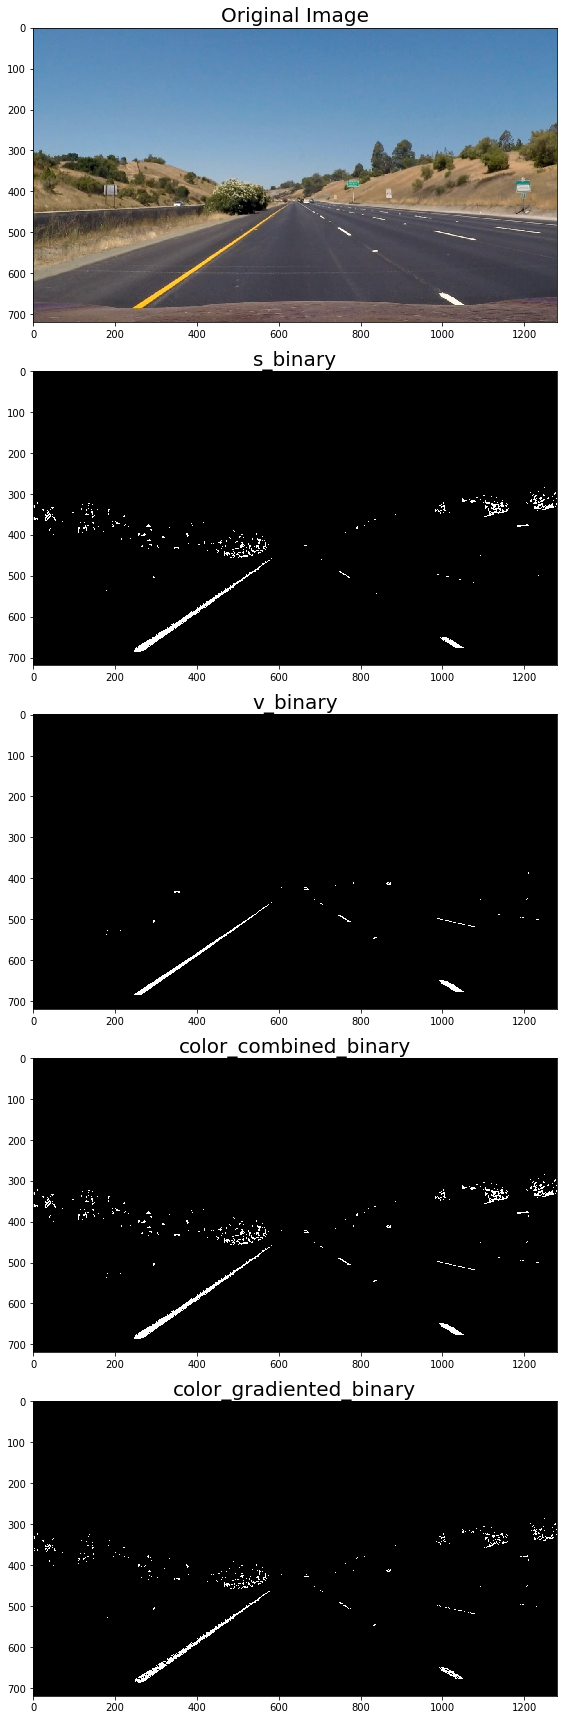

In [95]:
image = mpimg.imread('./test_images/straight_lines1.jpg')
#image = mpimg.imread('./debug_images/orig/frame532.jpg')
# image = mpimg.imread('./debug_images/orig/frame563.jpg')


hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS).astype(np.float)
hls_s = hls[:,:,2]

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float)
hsv_v = hsv[:,:,2]

color_thresh=(140, 255)

# Threshold color channel
s_binary = np.zeros_like(hls_s)
s_binary[(hls_s >= color_thresh[0]) & (hls_s <= color_thresh[1])] = 1

# s_gradiented_binary = ((s_binary == 1) & (dir_binary == 1)) # s_binary filtered by gradient

v_binary = np.zeros_like(hsv_v)
v_binary[(hsv_v >= 220) & (hsv_v <= 255)] = 1

color_combined_binary = np.zeros_like(s_binary)
color_combined_binary[ (s_binary == 1) | ( v_binary == 1)] =1

color_gradiented_binary = ((color_combined_binary == 1) & (hls_s_dir_binary == 1)) # s_binary filtered by gradient

######## plot ########
f, axes = plt.subplots(5, 1, squeeze=False, figsize=(8, 24))
f.tight_layout()

axes[0][0].imshow(image)
axes[0][0].set_title('Original Image', fontsize=20)

axes[1][0].imshow(s_binary, cmap='gray')
axes[1][0].set_title('s_binary', fontsize=20)
axes[2][0].imshow(v_binary, cmap='gray')
axes[2][0].set_title('v_binary', fontsize=20)

axes[3][0].imshow(color_combined_binary, cmap='gray')
axes[3][0].set_title('color_combined_binary', fontsize=20)
axes[4][0].imshow(color_gradiented_binary, cmap='gray')
axes[4][0].set_title('color_gradiented_binary', fontsize=20)